# Binary Classification of Housing Attributes: A Logistic Regression Approach
**Author: May Cooper**

## Project Overview
This project uses supervised learning techniques, specifically Logistic Regression, to predict the presence or absence of a garage in residential properties. The dataset includes property-specific features such as square footage and other structural attributes.

## Research Question
Can square footage effectively predict whether a house has a garage?

## Objective
The objective of this analysis is to develop a statistically interpretable classification model that predicts garage presence using logistic regression. The results are intended to support housing market analysts and developers in identifying property features most associated with garage inclusion.

In [ ]:
# Load Data and Define Research Question and Goal
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = ''
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows to understand its structure
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [32]:
# Check for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_count}")

if duplicate_count > 0:
    print("Warning: The dataset contains duplicate rows.")
else:
    print("No duplicate rows found in the dataset.")

Number of duplicate rows in the dataset: 0
No duplicate rows found in the dataset.


#### Identifying the dependent and independent variables:
- Dependent Variable: `Garage` (binary, Yes/No)
- Independent Variables: `Price`, `SquareFootage`

In [ ]:
# Identify dependent and independent variables
dependent_var = 'Garage'
independent_vars = ['Price', 'SquareFootage']

In [ ]:
# Part 1: Summary statistics for independent variables
# Calculating summary stats like mean, median, and standard deviation for the independent variables
independent_stats = df[independent_vars].describe()
print("\nSummary Statistics for Independent Variables:")
print(independent_stats)

# Styling the summary stat table
styled_independent_stats = independent_stats.style.set_caption("Summary Statistics for Independent Variables").format(
    precision=2
).background_gradient(cmap="Blues")

# Part 2: Counts for the dependent variable
# Count the number of houses with and without garages
garage_counts = df[dependent_var].value_counts()

# Convert the counts to a DataFrame for easier styling and presentation
garage_counts_df = garage_counts.reset_index()
garage_counts_df.columns = ['Garage', 'Count']

print("\nCounts for Dependent Variable (Garage):")
print(garage_counts_df)

# Style the counts table
styled_garage_counts = garage_counts_df.style.set_caption("Counts for Dependent Variable (Garage)").background_gradient(
    cmap="Greens"
)

# Display unique values for the dependent variable to confirm it's binary
garage_unique = df[dependent_var].unique()
print("\nUnique Values in Dependent Variable (Garage):", garage_unique)

# Part 3: Custom statistics (mode and range) for independent variables
# Create a dictionary to store mode and range for each independent variable
custom_stats = {
    "Variable": [],
    "Mode": [],
    "Range": []
}

# Loop through the independent variables to calculate mode and range
for var in independent_vars:
    mode = df[var].mode()[0]  # Find the most common value
    range_ = df[var].max() - df[var].min()  # Calculate the range (max - min)
    custom_stats["Variable"].append(var)
    custom_stats["Mode"].append(mode)
    custom_stats["Range"].append(range_)

# Convert the custom statistics dictionary to a DataFrame for easier display
custom_stats_df = pd.DataFrame(custom_stats)
print("\nCustom Statistics for Independent Variables (Mode and Range):")
print(custom_stats_df)

# Style the custom stats table
styled_custom_stats = custom_stats_df.style.set_caption("Custom Statistics for Independent Variables (Mode and Range)").background_gradient(
    cmap="Oranges"
)

# Display the styled tables for all outputs
print("\nStyled Summary Statistics for Independent Variables:")
display(styled_independent_stats)

print("\nStyled Counts for Dependent Variable (Garage):")
display(styled_garage_counts)

print("\nStyled Custom Statistics for Independent Variables (Mode and Range):")
display(styled_custom_stats)


Summary Statistics for Independent Variables:
              Price  SquareFootage
count  7.000000e+03    7000.000000
mean   3.072820e+05    1048.947459
std    1.501734e+05     426.010482
min    8.500000e+04     550.000000
25%    1.921075e+05     660.815000
50%    2.793230e+05     996.320000
75%    3.918781e+05    1342.292500
max    1.046676e+06    2874.700000

Counts for Dependent Variable (Garage):
  Garage  Count
0     No   4488
1    Yes   2512

Unique Values in Dependent Variable (Garage): ['No' 'Yes']

Custom Statistics for Independent Variables (Mode and Range):
        Variable     Mode      Range
0          Price  85000.0  961675.64
1  SquareFootage    550.0    2324.70

Styled Summary Statistics for Independent Variables:


,Price,SquareFootage
count,7000.00,7000.00
mean,307281.97,1048.95
std,150173.43,426.01
min,85000.00,550.00
25%,192107.53,660.82
50%,279322.95,996.32
75%,391878.13,1342.29
max,1046675.64,2874.70



Styled Counts for Dependent Variable (Garage):


,Garage,Count
0,No,4488
1,Yes,2512



Styled Custom Statistics for Independent Variables (Mode and Range):


,Variable,Mode,Range
0,Price,85000.000000,961675.640000
1,SquareFootage,550.000000,2324.700000


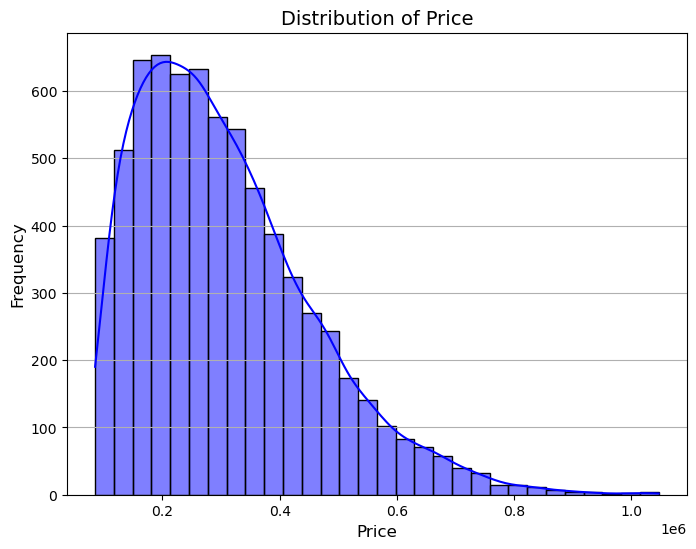

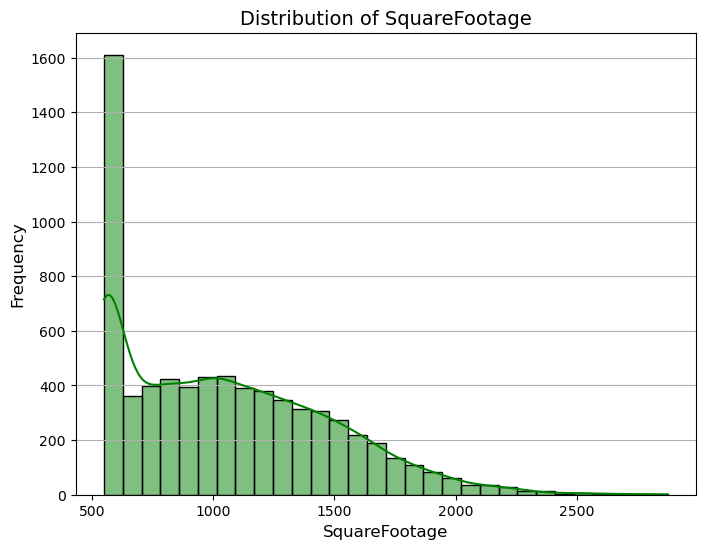

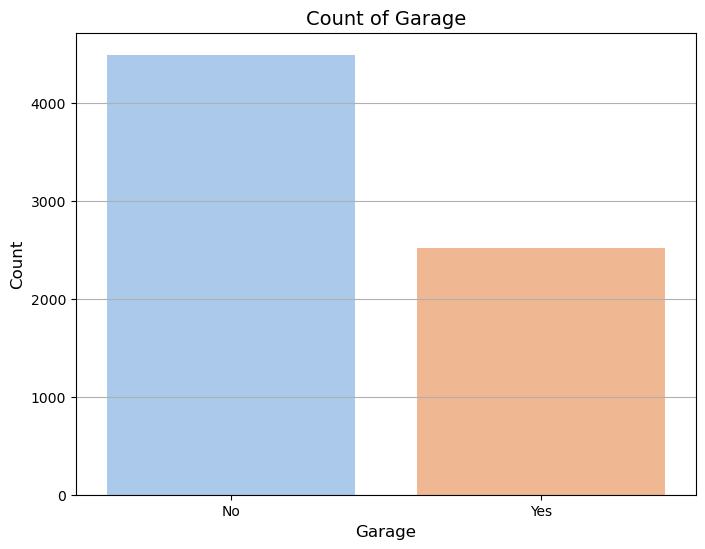

In [ ]:
# Univariate Visualizations

# Importign libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Variables for visualization
independent_vars = ['Price', 'SquareFootage']  # Variables we want to explore
dependent_var = 'Garage'  # Target variable

# Loop through variables to create histograms and bar plots
for var in independent_vars + [dependent_var]:
    plt.figure(figsize=(8, 6))
    if var == dependent_var:
        # Bar plot for 'Garage' to show counts of Yes/No
        sns.countplot(data=df, x=var, palette='pastel')
        plt.title(f'Count of {var}', fontsize=14)
        plt.ylabel('Count', fontsize=12)
    else:
        # Histogram for 'Price' and 'SquareFootage' to show distributions
        sns.histplot(df[var], kde=True, bins=30, color='blue' if var == 'Price' else 'green')
        plt.title(f'Distribution of {var}', fontsize=14)
        plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(var, fontsize=12)
    plt.grid(axis='y')
    plt.show()

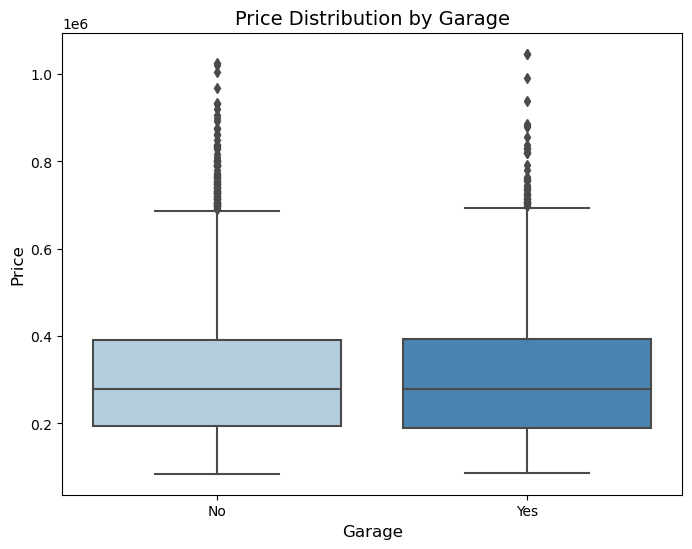

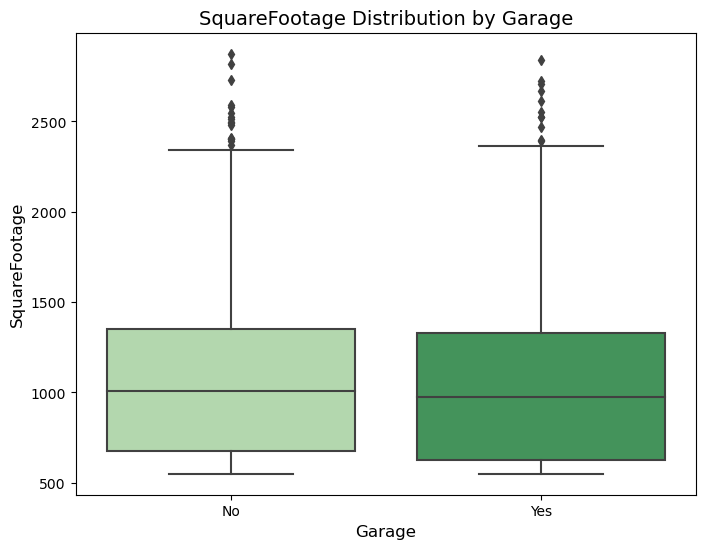

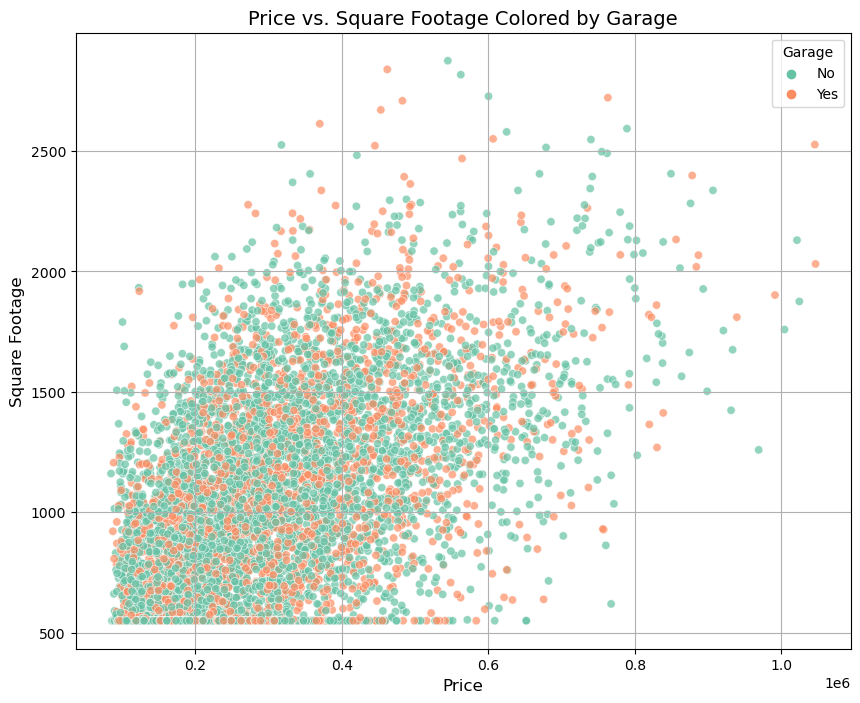

In [ ]:
# Bivariate Visualizations
# Create boxplots to compare distributions of 'Price' and 'SquareFootage' by 'Garage'
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=dependent_var, y=var, palette='Blues' if var == 'Price' else 'Greens')
    plt.title(f'{var} Distribution by {dependent_var}', fontsize=14)
    plt.xlabel(dependent_var, fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.show()

# Scatterplot for the relationship between 'Price' and 'SquareFootage', colored by 'Garage'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Price', y='SquareFootage', hue=dependent_var, palette='Set2', alpha=0.7)
plt.title(f'Price vs. Square Footage Colored by {dependent_var}', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Square Footage', fontsize=12)
plt.legend(title=dependent_var)
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing datasets

# Select dependent and independent variables
features = ['Price', 'SquareFootage']  # Independent variables
target = 'Garage'  # Dependent variable

# Prepare the feature matrix and target vector
X = df[features]
y = df[target].replace({'Yes': 1, 'No': 0})  # Map target to binary values for logistic regression

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Save the split datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Training and testing datasets saved as CSV files.")

Training set size: 5600 samples
Testing set size: 1400 samples
Training and testing datasets saved as CSV files.


In [ ]:
# Regression Model Creation and Optimization

import statsmodels.api as sm

# Function for forward stepwise selection
def forward_stepwise(X, y):
    remaining, selected = list(X.columns), []
    best_model, best_metrics = None, {"AIC": float("inf"), "BIC": float("inf"), "Pseudo_R2": 0}

    while remaining:
        results = [
            (feature, sm.Logit(y, sm.add_constant(X[selected + [feature]])).fit(disp=False))
            for feature in remaining
        ]
        best_feature, best_result = min(results, key=lambda x: x[1].aic)

        # Add feature if model improves
        if best_result.aic < best_metrics["AIC"]:
            selected.append(best_feature)
            remaining.remove(best_feature)
            best_model, best_metrics = best_result, {
                "AIC": best_result.aic,
                "BIC": best_result.bic,
                "Pseudo_R2": 1 - (best_result.llf / best_result.llnull),
            }
        else:
            break
    return best_model, selected, best_metrics

# Function for backward stepwise elimination
def backward_stepwise(X, y):
    selected, best_model = list(X.columns), None
    best_metrics = {"AIC": float("inf"), "BIC": float("inf"), "Pseudo_R2": 0}

    while selected:
        results = [
            (feature, sm.Logit(y, sm.add_constant(X[[f for f in selected if f != feature]])).fit(disp=False))
            for feature in selected
        ]
        worst_feature, best_result = min(results, key=lambda x: x[1].aic)

        # Remove feature if model improves
        if best_result.aic < best_metrics["AIC"]:
            selected.remove(worst_feature)
            best_model, best_metrics = best_result, {
                "AIC": best_result.aic,
                "BIC": best_result.bic,
                "Pseudo_R2": 1 - (best_result.llf / best_result.llnull),
            }
        else:
            break
    return best_model, selected, best_metrics

# Function for recursive feature elimination
def recursive_feature_elimination(X, y):
    selected, best_model = list(X.columns), None
    best_metrics = {"AIC": float("inf"), "BIC": float("inf"), "Pseudo_R2": 0}

    while len(selected) > 1:
        model = sm.Logit(y, sm.add_constant(X[selected])).fit(disp=False)
        p_values = model.pvalues[1:]  # Ignore constant
        max_p_value = p_values.max()

        # Remove least significant feature
        if max_p_value > 0.05:
            selected.remove(p_values.idxmax())
        else:
            best_model, best_metrics = model, {
                "AIC": model.aic,
                "BIC": model.bic,
                "Pseudo_R2": 1 - (model.llf / model.llnull),
            }
            break
    return best_model, selected, best_metrics

# Apply optimization methods and compare results
methods = {
    "Forward Stepwise Selection": forward_stepwise,
    "Backward Stepwise Elimination": backward_stepwise,
    "Recursive Feature Elimination": recursive_feature_elimination,
}

best_model, best_metrics, best_method = None, {"AIC": float("inf")}, None

for method_name, method in methods.items():
    print(f"Running {method_name}...")
    model, features, metrics = method(X_train, y_train)
    print(f"{method_name} - Features: {features}, AIC: {metrics['AIC']}, BIC: {metrics['BIC']}, Pseudo R²: {metrics['Pseudo_R2']}")

    # Track the best model based on AIC
    if metrics["AIC"] < best_metrics["AIC"]:
        best_model, best_metrics, best_method = model, metrics, method_name
        best_overall_model = best_model

# Display the best model
print(f"\nBest Method: {best_method}")
print(f"Best Metrics: AIC={best_metrics['AIC']}, BIC={best_metrics['BIC']}, Pseudo R²={best_metrics['Pseudo_R2']}")
print(best_model.summary())

# Save best model summary
with open("best_model_summary.txt", "w") as file:
    file.write(best_model.summary().as_text())
print("Saved best model summary to 'best_model_summary.txt'")

Running Forward Stepwise Selection...
Forward Stepwise Selection - Features: ['SquareFootage'], AIC: 7322.010701361367, BIC: 7335.271745114814, Pseudo R²: 0.0006641649685238393
Running Backward Stepwise Elimination...
Backward Stepwise Elimination - Features: ['SquareFootage'], AIC: 7322.010701361367, BIC: 7335.271745114814, Pseudo R²: 0.0006641649685238393
Running Recursive Feature Elimination...
Recursive Feature Elimination - Features: ['SquareFootage'], AIC: inf, BIC: inf, Pseudo R²: 0

Best Method: Forward Stepwise Selection
Best Metrics: AIC=7322.010701361367, BIC=7335.271745114814, Pseudo R²=0.0006641649685238393
                           Logit Regression Results                           
Dep. Variable:                 Garage   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5598
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:  

Training Set Confusion Matrix:
[3580    0]
[2020    0]
Training Set Accuracy: 0.6393


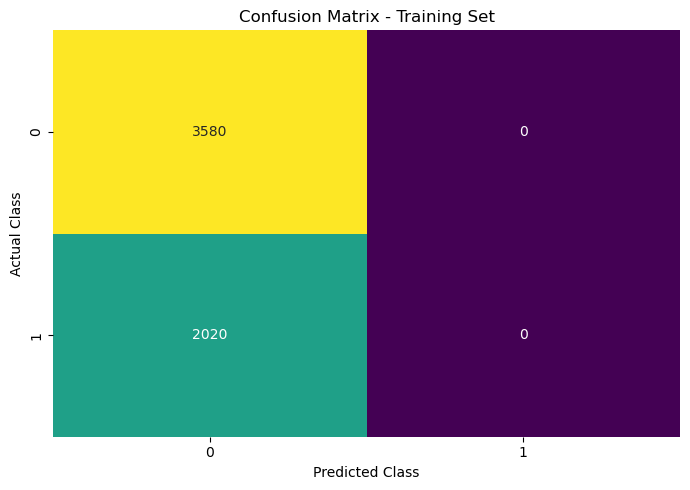

In [ ]:
# Confusion Matrix and Accuracy on Training Set

# Import libraries
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get selected features from the best model
selected_features = [
    feature for feature in best_overall_model.model.exog_names if feature != "const"
]  # Exclude the constant term

# Prepare data for prediction
X_train_selected = sm.add_constant(X_train[selected_features])  # Add constant for prediction
y_train_predicted = best_overall_model.predict(X_train_selected)
y_train_classified = (y_train_predicted >= 0.5).astype(int)  # Threshold to classify

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_train, y_train_classified)
accuracy = accuracy_score(y_train, y_train_classified)

# Display textual output
print("Training Set Confusion Matrix:")
for row in conf_matrix:
    print(row)  # Print each row of the confusion matrix
print(f"Training Set Accuracy: {accuracy:.4f}")

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.tight_layout()
plt.show()

Test Set Confusion Matrix:
[908   0]
[492   0]
Test Set Accuracy: 0.6486


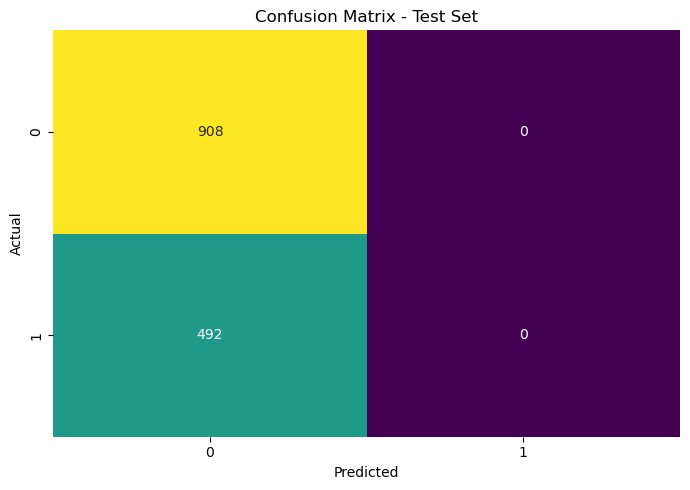

In [ ]:
# Test Set Confusion Matrix and Accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get the features used by the best model (exclude the constant term)
selected_features = [f for f in best_overall_model.model.exog_names if f != "const"]

# Prepare test data for prediction
X_test_selected = sm.add_constant(X_test[selected_features])
y_test_pred = (best_overall_model.predict(X_test_selected) >= 0.5).astype(int)

# Calculate confusion matrix and accuracy for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print confusion matrix and accuracy
print("Test Set Confusion Matrix:")
for row in test_conf_matrix:
    print(row)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [42]:
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIFs
X = df[['Price', 'SquareFootage']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        Variable       VIF
0          const  7.762791
1          Price  1.426232
2  SquareFootage  1.426232
